In [1]:
import numpy as np 
import pandas as pd 
from glob import glob 
import os
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from  tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model 
from tensorflow.keras.utils import to_categorical , plot_model 
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import LSTM 
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.callbacks import ModelCheckpoint

In [3]:
from  tensorflow.keras.applications import ResNet50
incept_model = ResNet50(include_top=True)
#incept_model.summary()

102981632/102967424 [==============================] - 1s 0us/step


In [4]:
from tensorflow.keras.models import Model 
last_layer = incept_model.layers[-2].output
res_net_model = Model(inputs=incept_model.input,outputs=last_layer)
#res_net_model.summary()

In [5]:
##from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
##tokenizer = Tokenizer(oov_token="Other")

In [6]:
import pickle
with open("/content/drive/MyDrive/MajorProject/MODELS/caption_tokenizer.pkl", "rb") as f:
  tokenizer = pickle.load(f)


In [7]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/MajorProject/MODELS/caption_MODEL_1_RESNET_100.h5')

In [8]:
max_len = 32

In [9]:
def captionITWithImage(test_img):    

    #path = '/content/dog_2.jfif'
    #test_img_path = path
    #test_img = cv2.imread(test_img_path, 1)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
    test_img = cv2.resize(test_img, (224,224))
    test_img = np.reshape(test_img, (1,224,224,3))

    test_feature = res_net_model.predict(test_img).reshape(1,2048)
        
    #test_img_path = path
    #test_img = cv2.imread(test_img_path, 1)
    #test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    text_inp = ['startofseq']

    count = 0
    caption = ''
    while count < 25:
      count += 1
      encoded = tokenizer.texts_to_sequences(text_inp)
      
      encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=max_len)
      prediction = np.argmax(new_model.predict([test_feature, encoded]))
      for k,v in tokenizer.word_index.items():
          if v == prediction:
              sampled_word = k
              break              
      
      if sampled_word == 'endofseq':
        break
    
      caption = caption + ' ' + sampled_word
            
      text_inp[0] += ' ' + sampled_word
    
    plt.figure()
    plt.imshow(test_img.reshape(224,224,3))
    plt.xlabel(caption)


    return caption

In [10]:
from google.colab.patches import cv2_imshow

In [11]:
def crop_and_caption(PATH):
  
  img = cv2.imread(PATH)
  #cv2_imshow(img)
  primary_caption = captionITWithImage(img)
  print()
  img_crop1 = img[0:int(img.shape[0]/2), 0:int(img.shape[1]/2)]
  #cv2_imshow(img_crop1)
  crop_caption1 = captionITWithImage(img_crop1)

  img_crop2 = img[0:int(img.shape[0]/2), int(img.shape[1]/2):int(img.shape[1])]
  #cv2_imshow(img_crop2)
  crop_caption2 = captionITWithImage(img_crop2)

  img_crop3 = img[int(img.shape[0]/2):int(img.shape[0]), 0:int(img.shape[1]/2)]
  #cv2_imshow(img_crop3)
  crop_caption3 = captionITWithImage(img_crop3)

  img_crop4 = img[int(img.shape[0]/2):int(img.shape[0]), int(img.shape[1]/2):int(img.shape[1])]
  #cv2_imshow(img_crop4)
  crop_caption4 = captionITWithImage(img_crop4)

  img_crop5 = img[int(img.shape[0]/4):int(3*img.shape[0]/4), int(img.shape[1]/4):int(3*img.shape[1]/4)]
  #cv2_imshow(img_crop5)
  crop_caption5 = captionITWithImage(img_crop5)

  return primary_caption, crop_caption1, crop_caption2, crop_caption3, crop_caption4, crop_caption5

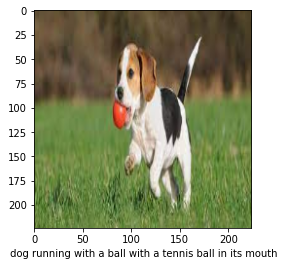

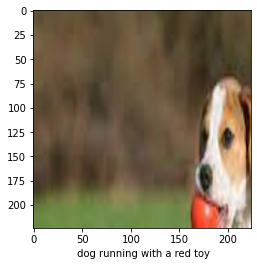

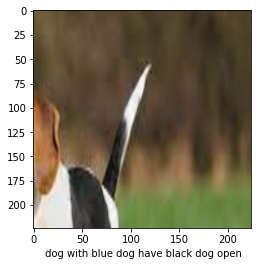

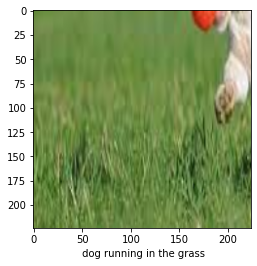

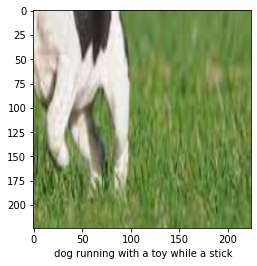

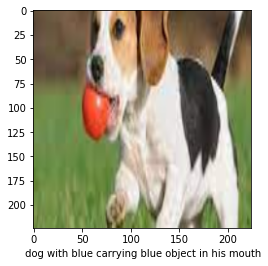

In [15]:
PATH = "/content/drive/MyDrive/1. MajorProject/DATASET/Images/dog_3.jfif"
primary_caption, crop_caption1, crop_caption2, crop_caption3, crop_caption4, crop_caption5 = crop_and_caption(PATH)

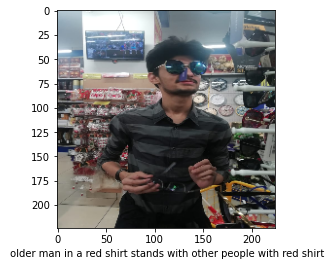

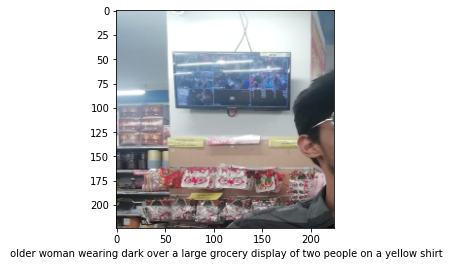

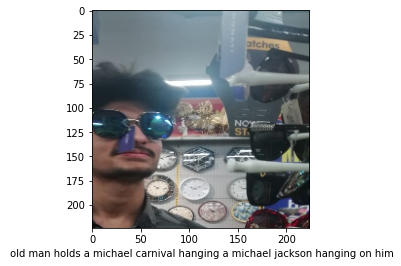

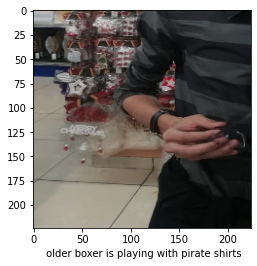

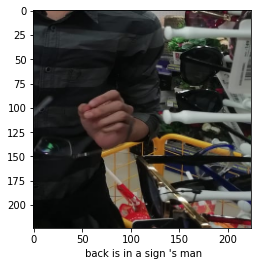

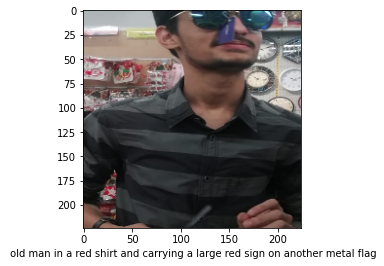

In [17]:
PATH = "/content/drive/MyDrive/1. MajorProject/DATASET/Images/mihir.jpeg"
primary_caption, crop_caption1, crop_caption2, crop_caption3, crop_caption4, crop_caption5 = crop_and_caption(PATH)

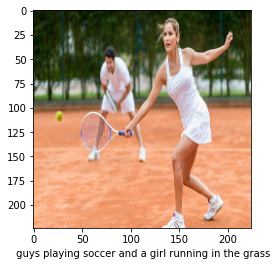

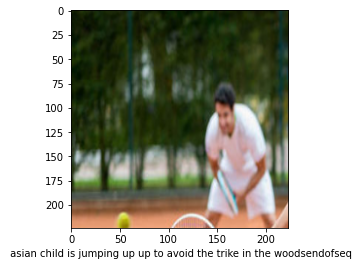

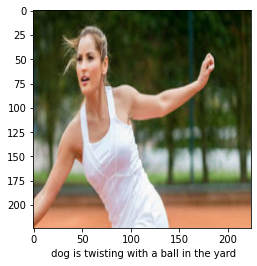

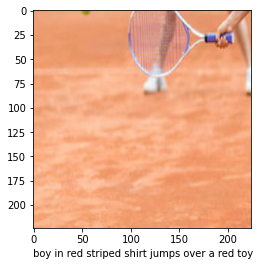

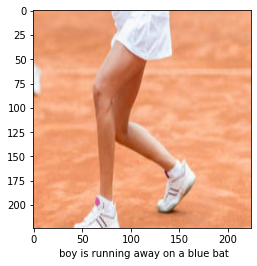

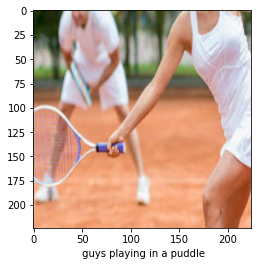

In [19]:
PATH = "/content/drive/MyDrive/1. MajorProject/DATASET/Images/tennis_1.jpg"
primary_caption, crop_caption1, crop_caption2, crop_caption3, crop_caption4, crop_caption5 = crop_and_caption(PATH)

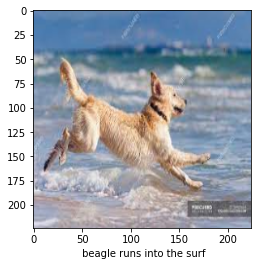

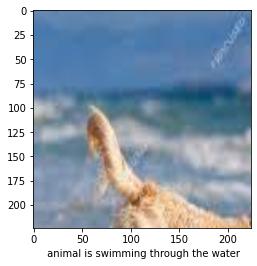

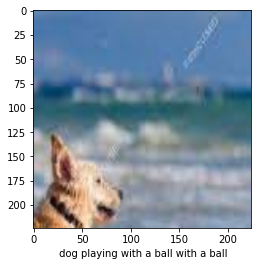

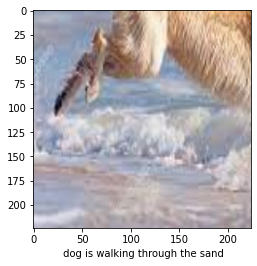

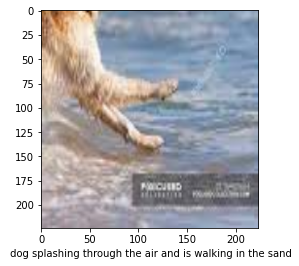

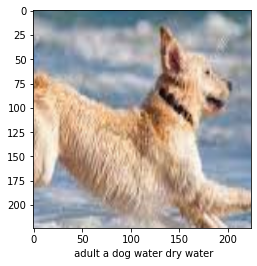

In [ ]:
PATH1 = "/content/drive/MyDrive/MajorProject/DATASET/Images/dog_2.jfif"
primary_caption, crop_caption1, crop_caption2, crop_caption3, crop_caption4, crop_caption5 = crop_and_caption(PATH1)

In [ ]:
primary_caption

' beagle runs into the surf'

**Tagging**

In [ ]:
import numpy as np
import pandas as pd 
from subprocess import check_output
import nltk
from nltk.corpus import brown
from nltk import word_tokenize, pos_tag

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
dict_map = dict()
dict_map['CC'] = 'coordinating conjunction'
dict_map['CD'] = 'cardinal digit'
dict_map['EX'] = 'existential there, “there exists”'
dict_map['NN'] = 'noun, singular'
dict_map['FW'] = 'foreign word'
dict_map['DT'] = 'determiner'
dict_map['IN'] = 'preposition/subordinating conjunction'
dict_map['JJ'] = 'adjective'
dict_map['JJR'] = 'adjective, comparative'
dict_map['JJS'] = 'adjective, superlative'
dict_map['MD'] = 'modal could, will'
dict_map['NNS'] = 'noun plural'
dict_map['NNP'] = 'proper noun, singular'
dict_map['NNPS'] = 'proper noun, plural'
dict_map['PDT'] = 'predeterminer'
dict_map['POS'] = 'possessive'
dict_map['PRP'] = 'personal pronoun I, he, she'
dict_map['PRP$'] = 'possessive pronoun my, his, hers'
dict_map['RB'] = 'adverb'
dict_map['RBR'] = 'adverb, comparative'
dict_map['RBS'] = 'adverb, superlative'
dict_map['UH'] = 'interjection'
dict_map['VB'] = 'verb, base form take'
dict_map['VBD'] = 'verb, past tense took'
dict_map['VBG'] = 'gerund/present participle taking'
dict_map['VBN'] = 'verb, past participle taken'
dict_map['VBP'] = 'verb, sing. present, non-3d take'
dict_map['VBZ'] = 'verb, 3rd person sing. present takes'
dict_map['WDT'] = 'wh-determiner which'
dict_map['WP'] = 'wh-pronoun who, what'
dict_map['WP$'] = 'possessive wh-pronoun whose'
dict_map['WRB'] = 'wh-abverb where, when'

In [ ]:
def tagIT(text, dict_map):
  
  split_text = word_tokenize(text)
  tags = nltk.pos_tag(split_text)
  
  print("WORD\t\t" + "TAG")
  for pair in tags:
    print(str(pair[0]) + "\t\t" + str(dict_map.get(pair[1])))

In [ ]:
tagIT(primary_caption, dict_map)

WORD		TAG
beagle		noun, singular
runs		verb, 3rd person sing. present takes
into		preposition/subordinating conjunction
the		determiner
surf		noun, singular


In [ ]:
tagIT(crop_caption1, dict_map)

WORD		TAG
animal		noun, singular
is		verb, 3rd person sing. present takes
swimming		gerund/present participle taking
through		preposition/subordinating conjunction
the		determiner
water		noun, singular


In [ ]:
tagIT(crop_caption2, dict_map)

WORD		TAG
dog		noun, singular
playing		gerund/present participle taking
with		preposition/subordinating conjunction
a		determiner
ball		noun, singular
with		preposition/subordinating conjunction
a		determiner
ball		noun, singular


In [ ]:
tagIT(crop_caption3, dict_map)

WORD		TAG
dog		noun, singular
is		verb, 3rd person sing. present takes
walking		gerund/present participle taking
through		preposition/subordinating conjunction
the		determiner
sand		noun, singular


In [ ]:
tagIT(crop_caption4, dict_map)

WORD		TAG
dog		noun, singular
splashing		gerund/present participle taking
through		preposition/subordinating conjunction
the		determiner
air		noun, singular
and		coordinating conjunction
is		verb, 3rd person sing. present takes
walking		gerund/present participle taking
in		preposition/subordinating conjunction
the		determiner
sand		noun, singular


In [ ]:
tagIT(crop_caption5, dict_map)

WORD		TAG
adult		noun, singular
a		determiner
dog		adjective
water		noun, singular
dry		adjective
water		noun, singular
